### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (2 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny) (3 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

In [1]:
using DataFrames
using Roots
using ForwardDiff

# Sześć wybranych funkcji ze zbioru
a(x) = sin(x) - x/2 #1
b(x) = 2*x - exp(-x) #2
c(x) = x * exp(-x) #3
d(x) = (x + 3) * (x - 1)^2 #5
e(x) = x^3 #7
f(x) = 20.0 * x / ( 100.0 * x * x + 1.0 ) #10 the Repeller

# Tablica funkcji
functions = [a, b, c, d, e, f]

# Tablica przedziałów dla pierwszej metody
ranges = [(-3, -1), (0, 1), (-0.05, 5), (-4, -2), (-3, 1), (0, 1)]

# Tablica punktów startowych dla drugiej i trzeciej metody
points = [-2, 0.5, 0.5, -2.5, 0.5, 0.5]


# Struktura DataFrame
results = DataFrame(method_name = String[], function_name = String[], steps_count = Int[], fn_calls_count = Int[], result = Float64[], result_fn_value = Float64[], is_zero = Bool[])


# Testowanie
for i in 1:length(functions)

    fun = functions[i]

    # Metoda bisekcji
    tracker = Roots.Tracks()
    x = find_zero(fun, ranges[i], Bisection(), tracks = tracker)

    push!(results, ("Bisection", string(fun), tracker.steps, tracker.fncalls, x, fun(x), iszero(fun(x))))


    # Metoda Newtona

    # Definujemy D(f) obliczającą  funkcje pochodną 
    D(h) = x->ForwardDiff.derivative(h, float(x))

    tracker = Roots.Tracks()
    x = find_zero((fun, D(fun)), points[i], Roots.Newton(), tracks = tracker)

    push!(results, ("Newton", string(fun), tracker.steps, tracker.fncalls, x, fun(x), iszero(fun(x))))


    # Metoda siecznych
    tracker = Roots.Tracks()
    x = find_zero(fun, points[i], Order1(), tracks = tracker)

    push!(results, ("Secant", string(fun), tracker.steps, tracker.fncalls, x, fun(x), iszero(fun(x))))

end

# Tabelka wyników
print(results)


18×7 DataFrame
 Row │ method_name  function_name  steps_count  fn_calls_count  result        result_fn_value  is_zero 
     │ String       String         Int64        Int64           Float64       Float64          Bool    
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Bisection    a                       51              54  -1.89549          0.0             true
   2 │ Newton       a                        4               8  -1.89549          0.0             true
   3 │ Secant       a                        5               7  -1.89549          0.0             true
   4 │ Bisection    b                       61              64   0.351734         0.0             true
   5 │ Newton       b                        4               8   0.351734         0.0             true
   6 │ Secant       b                        5               7   0.351734         0.0             true
   7 │ Bisection    c                        0         

2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (2 pkt)

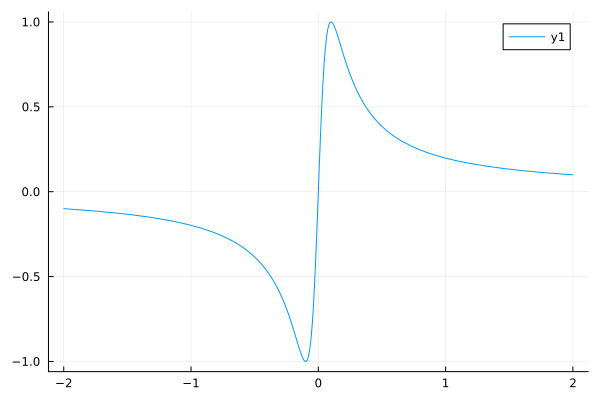

In [2]:
using Plots

Repeller(x) = 20.0 * x / ( 100.0 * x * x + 1.0 )

plot(Repeller, -2, 2)

In [3]:
# Struktura DataFrame
results = DataFrame(method_name = String[], function_name = String[], steps_count = Int[], fn_calls_count = Int[], result = Float64[], result_fn_value = Float64[], is_zero = Bool[])

# Metoda bisekcji
tracker = Roots.Tracks()
x = find_zero(Repeller, (-1, 1), Bisection(), tracks = tracker)

push!(results, ("Bisection", "Repeller", tracker.steps, tracker.fncalls, x, Repeller(x), iszero(Repeller(x))))


# Metoda Newtona

# Definujemy D(f) obliczającą  funkcje pochodną 
D(h) = x->ForwardDiff.derivative(h, float(x))

tracker = Roots.Tracks()
x = find_zero((Repeller, D(Repeller)), 0.5, Roots.Newton(), tracks = tracker)

push!(results, ("Newton", "Repeller", tracker.steps, tracker.fncalls, x, Repeller(x), iszero(Repeller(x))))

# Metoda siecznych)
tracker = Roots.Tracks()
x = find_zero(Repeller, 0.5, Order1(), tracks = tracker)

push!(results, ("Secant", "Repeller", tracker.steps, tracker.fncalls, x, Repeller(x), iszero(Repeller(x))))

Row,method_name,function_name,steps_count,fn_calls_count,result,result_fn_value,is_zero
,String,String,Int64,Int64,Float64,Float64,Bool
1,Bisection,Repeller,0,3,0.0,0.0,true
2,Newton,Repeller,25,50,1.76921e7,1.13045e-8,false
3,Secant,Repeller,36,38,2.05941e7,9.71154e-9,false


3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny) (3 pkt)

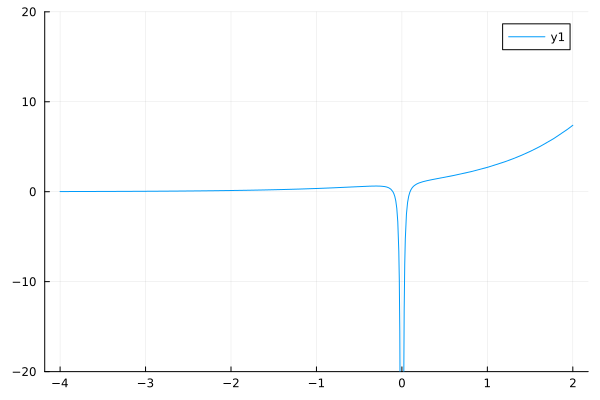

In [4]:
using Plots

fun1(x) = exp( x ) - 1 / ( 10 * x )^2

plot(fun1, -4, 2, ylim=(-20,20))

In [5]:
# Metoda bisekcji
find_zero(fun1, (-1, 1))

ArgumentError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



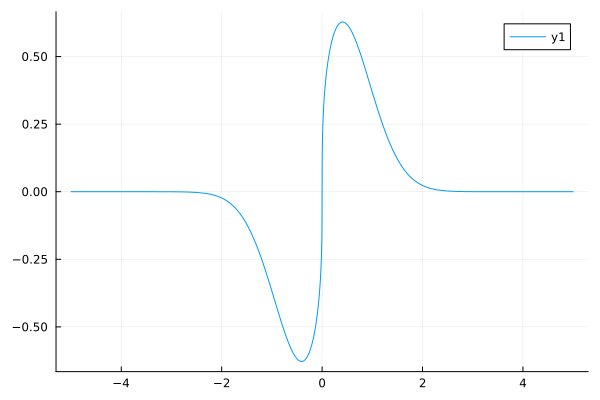

In [6]:
using Plots

# a pathological function for Newton's method
function fun2(x)
    if x < 0.0
        fx = -abs(x)^(1.0/3.0)*exp(-x^2)
    elseif x == 0.0
        fx = 0.0
    else
        fx = abs(x)^(1.0/3.0)*exp(-x^2)
    end
    return fx
end
plot(fun2)

In [7]:
# Metoda Newtona

D(h) = x->ForwardDiff.derivative(h, float(x))

find_zero((fun2, D(fun2)), 0, Roots.Newton())

Roots.ConvergenceFailed: Roots.ConvergenceFailed("Algorithm failed to converge")

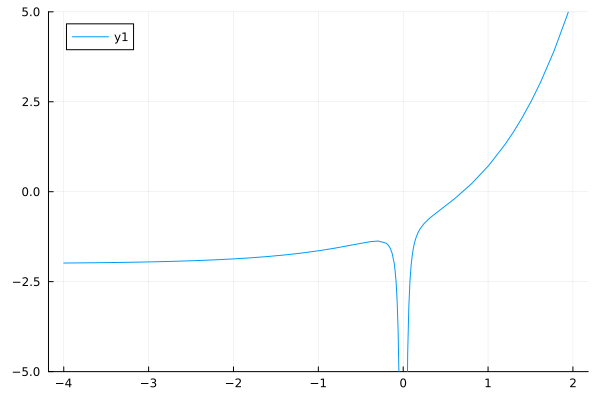

In [8]:
using Plots

fun3(x) = exp( x ) - 2 - 1 / ( 10 * x )^2 + 2 / ( 100 * x )^3

plot(fun3, -4, 2, ylim=(-5,5))

In [9]:
# Metoda siecznych
x_fun3 = find_zero(fun3, 0, Order1(), tracks = tracker)

0.0

In [10]:
fun3(x_fun3)

NaN